In [39]:
import pandas as pd
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [40]:
cny=teams['year'].unique()

In [41]:
total_entries = teams[teams['year'] >= 2012].shape[0]

total_entries
 

408

In [42]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [43]:
teams['year'].astype('Float64')
teams['athletes'].astype('Float64')
teams['medals'].astype('Float64')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2139    0.0
2140    3.0
2141    4.0
2142    0.0
2143    0.0
Name: medals, Length: 2144, dtype: Float64

In [44]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [45]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [46]:
corr_matrix = teams[['year','athletes','age','prev_medals','medals']].corr()
corr_matrix

,year,athletes,age,prev_medals,medals
year,1.000000,-0.056957,-0.012179,-0.017917,-0.021603
athletes,-0.056957,1.000000,0.036358,0.810576,0.840817
age,-0.012179,0.036358,1.000000,0.032596,0.025096
prev_medals,-0.017917,0.810576,0.032596,1.000000,0.920048
medals,-0.021603,0.840817,0.025096,0.920048,1.000000


<Axes: >

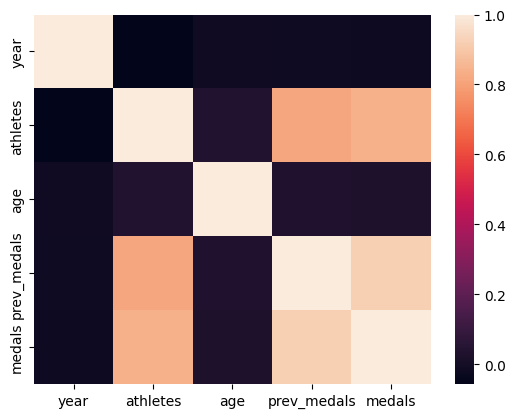

In [47]:
sns.heatmap(corr_matrix)

In [48]:
import seaborn  as sns

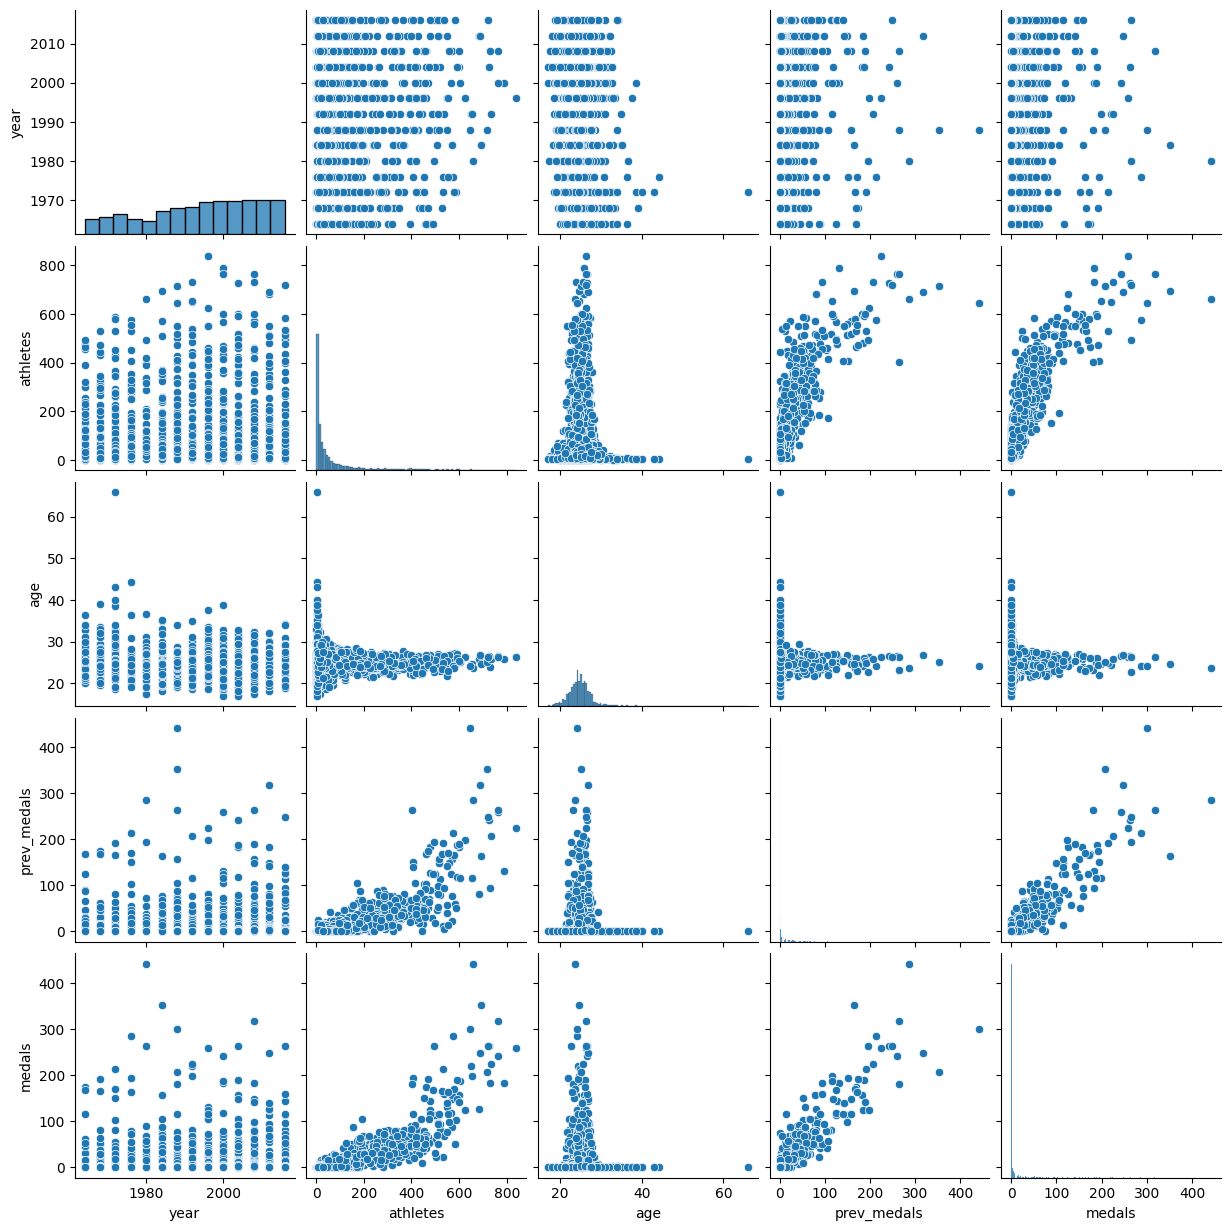

In [49]:
sns.pairplot(data=teams)

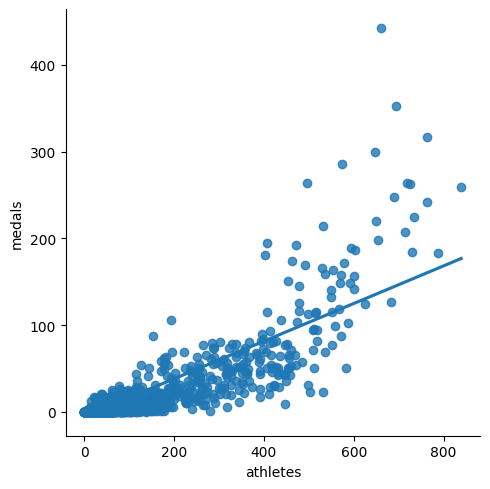

In [50]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True, ci=None)

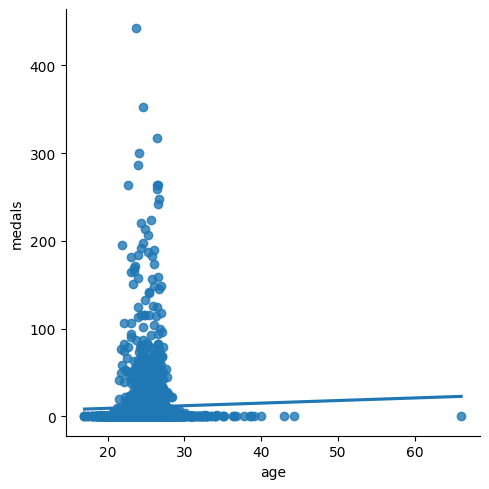

In [51]:
sns.lmplot(x="age",y="medals", data=teams, fit_reg=True, ci=None)


<Axes: ylabel='Frequency'>

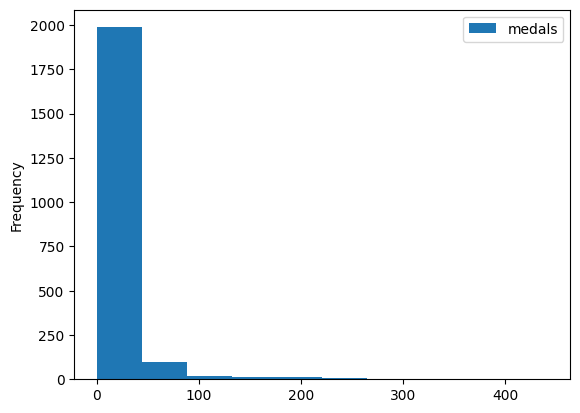

In [52]:
teams.plot.hist(y="medals")

In [53]:
#Data Cleaning
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [54]:
teams = teams.dropna()

In [55]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [56]:
train = teams[teams["year"]<2012].copy()
test = teams[teams["year"]>=2012].copy()

In [57]:
train.shape

(1609, 7)

In [58]:
test.shape

(405, 7)

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [60]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [61]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [62]:
LinearRegression()

LinearRegression()

In [63]:
predictions = reg.predict(test[predictors])

In [64]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [84]:
test["predictions"]= predictions

In [85]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [67]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [68]:
test["predictions"] = test["predictions"].round()

In [69]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [70]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,precision_score,recall_score,f1_score
MEAerror = mean_absolute_error(test["medals"], test["predictions"])
print("MEA : ", MEAerror)
clr = classification_report(test["medals"], test["predictions"])
print("Classification report : ", clr)

MEA :  3.2987654320987656
Classification report :                precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       235
         1.0       0.12      0.03      0.05        29
         2.0       0.12      0.10      0.11        20
         3.0       0.00      0.00      0.00        11
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         9
         6.0       0.09      0.25      0.13         4
         7.0       0.10      0.14      0.12         7
         8.0       0.20      0.14      0.17         7
         9.0       0.33      1.00      0.50         1
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         3
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         2
        16.0       0.00      0

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

In [71]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [72]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [73]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [74]:
errors = (test["medals"] - predictions).abs()
errors

6       1.961221
7       1.176333
24      1.425032
25      1.711847
37      1.155629
          ...   
2111    1.926958
2131    1.640143
2132    1.640143
2142    1.505767
2143    0.080748
Name: medals, Length: 405, dtype: float64

In [75]:
error_by_team=errors.groupby(test["team"]).mean()
error_by_team

team
AFG    1.568777
ALB    1.568439
ALG    1.535133
AND    1.783551
ANG    0.322667
         ...   
VIE    1.231905
VIN    1.891106
YEM    1.891106
ZAM    1.640143
ZIM    0.793257
Name: medals, Length: 204, dtype: float64

In [76]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [77]:
error_ratio = error_by_team / medals_by_team
error_ratio

team
AFG    3.137554
ALB         inf
ALG    1.023422
AND         inf
ANG         inf
         ...   
VIE    1.231905
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [78]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    3.137554
ALB         inf
ALG    1.023422
AND         inf
ANG         inf
         ...   
VIE    1.231905
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [79]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    3.137554
ALG    1.023422
ARG    0.841636
ARM    0.433824
AUS    0.362901
         ...   
UKR    0.946412
USA    0.128207
UZB    0.658187
VEN    1.710208
VIE    1.231905
Name: medals, Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

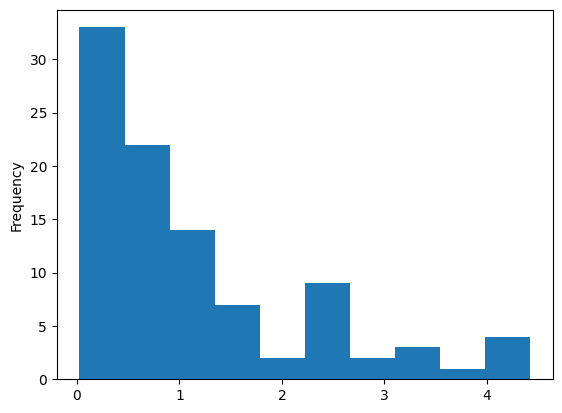

In [80]:
error_ratio.plot.hist()

In [81]:
error_ratio.sort_values()

team
FRA    0.024289
CAN    0.050844
NZL    0.071349
RUS    0.081841
ITA    0.119537
         ...   
PHI    3.563248
JOR    4.065175
BDI    4.136878
AUT    4.257950
NIG    4.423693
Name: medals, Length: 97, dtype: float64

In [82]:
#Add in more predictors
#Try different Machine Learning Models like Random Forest and Neural Network
#Build a model to predict if a particular athelete is going to win the medal
#How much model does a country would win
#Try to reshape some of these columns which is have some non linear relation using the mathematical relations.
#Measure the error more precictively
#You can also train a models for different types of countries.

